In [3]:
import solve_model as sm
import inequality_measure_plot as imp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# %matplotlib inline
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)

# 1 The experiment with aggregate shocks

## 1.1 Step 1-2

In [4]:
%%time
ifp6 = sm.IFP(a_y=0.5, b_y=1.0, c_y=1.0,
              a_r=0.2270572, b_r=0.1, c_r=0.03433458, 
              grid_max=10000,
             grid_size=1000)  

k = len(ifp6.s_grid)
n = len(ifp6.P)

σ_init = np.empty((k, n))
for z in range(n):
    σ_init[:, z] = ifp6.s_grid
a_init = np.copy(σ_init)

a_good_seq6, a_bad_seq6, σ_good_seq6, σ_bad_seq6, a_star6, σ_star6 = sm.solve_model_time_iter(ifp6, a_init, σ_init, print_skip=5)
print("beta, beta R, R_mean and sR are", ifp6.β, ifp6.βR, ifp6.R_mean, ifp6.sR)

Error at iteration 5 is 539.9246092284088.
Error at iteration 10 is 122.15563550189154.
Error at iteration 15 is 52.00398429840607.
Error at iteration 20 is 27.904734205666045.
Error at iteration 25 is 16.844557435248134.
Error at iteration 30 is 10.901956616492043.
Error at iteration 35 is 7.372659568500012.
Error at iteration 40 is 5.135822088534951.
Error at iteration 45 is 3.651589330915158.
Error at iteration 50 is 2.6336988481422168.
Error at iteration 55 is 1.9197348798985558.
Error at iteration 60 is 1.4096762774739773.
Error at iteration 65 is 1.0409523965450944.
Error at iteration 70 is 0.7719493470311818.
Error at iteration 75 is 0.5743269095578398.
Error at iteration 80 is 0.42837889124217554.
Error at iteration 85 is 0.3201541032985915.
Error at iteration 90 is 0.23964767309860235.
Error at iteration 95 is 0.17960999955056423.
Error at iteration 100 is 0.13474697911829026.
Error at iteration 105 is 0.10116943111432875.
Error at iteration 110 is 0.0760063158620028.
Error at

## 1.2 Step 3-6: figure 4

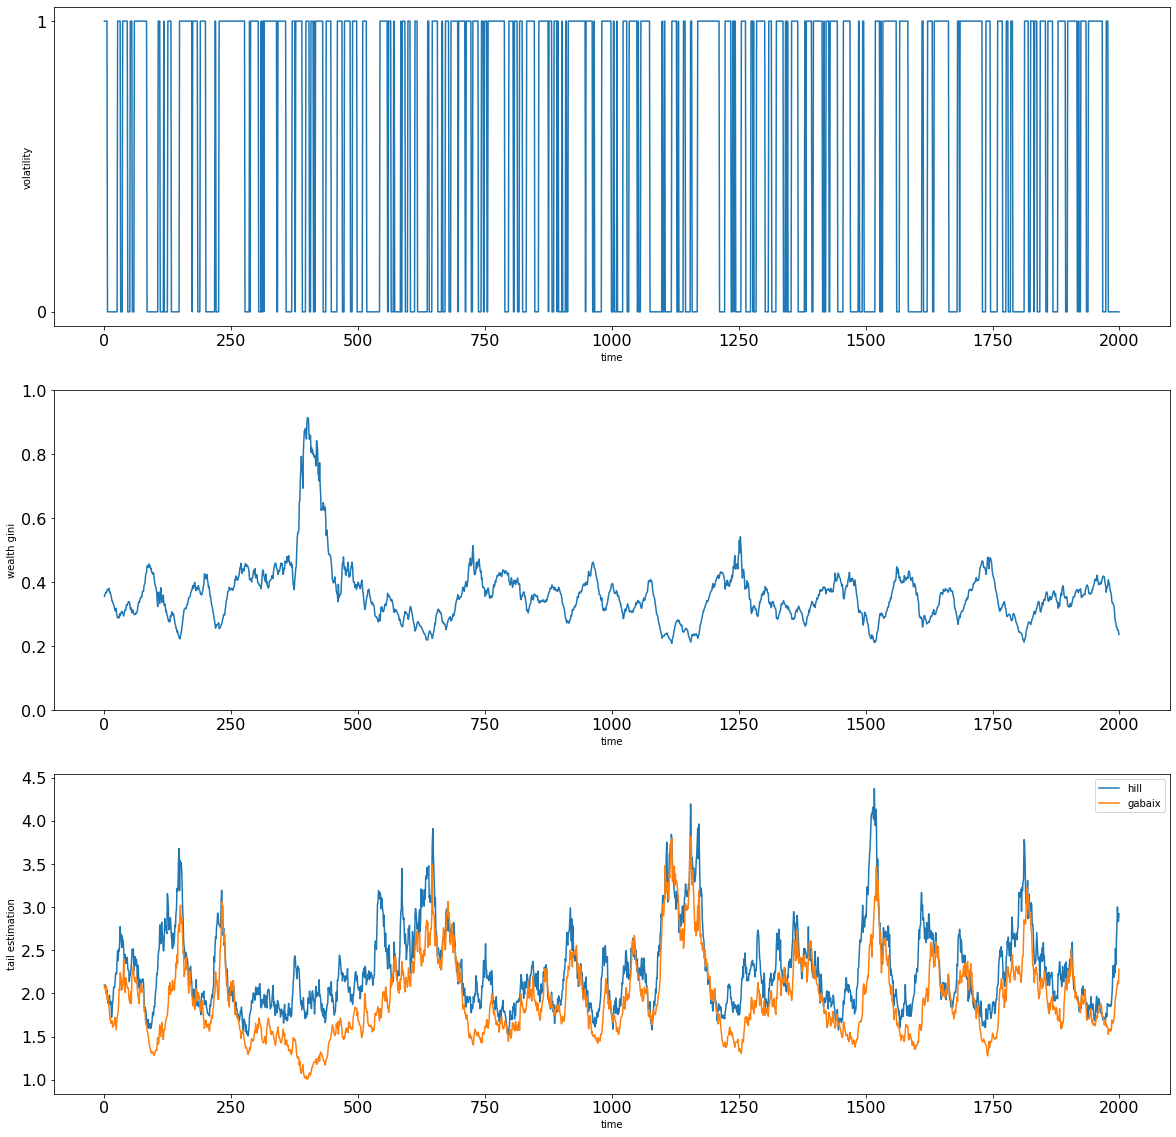

Respectively, the mean, variance and autocorrelation of ginis are 0.36118067683326505 0.00854606972919128 -0.011536071248714922
CPU times: user 2min 36s, sys: 11.3 s, total: 2min 48s
Wall time: 26.5 s


In [25]:
%%time
ginis6, tail_index_hill6, tail_index_gabaix6, z_seq_new6, dists6 = imp.dynamic_inequality(ifp6, a_star6, σ_star6,
                                                                                          num_households=2000,
                                                                                          burn_in_length=50,
                                                                                          sim_length=2000,
                                                                                          c=1,
                                                                                         z=0)

imp.plot_dynamic_inequality(z_seq_new6, ginis6, tail_index_hill6, tail_index_gabaix6,
                           path='/Users/shuhu/Desktop/1_papers_w:john/3_thesis/figures/fig52.png')

print('Respectively, the mean, variance and autocorrelation of ginis are', 
      np.mean(ginis6), 
      np.var(ginis6), 
      np.mean(sm.estimated_autocorrelation(ginis6)))

# 2 The experiment without aggregate shocks

## 2.1 Step 1-2

In [7]:
%%time
ifp7 = sm.IFP(a_y=0.5, b_y=0.0, c_y=1.0,
              a_r=0.2270572, b_r=0.0, c_r=0.03433458, 
              grid_max=10000,
             grid_size=1000)  # grid_size=xx means that we have xx households in our economy

k = len(ifp7.s_grid)
n = len(ifp7.P)

σ_init = np.empty((k, n))
for z in range(n):
    σ_init[:, z] = ifp7.s_grid
a_init = np.copy(σ_init)

a_good_seq7, a_bad_seq7, σ_good_seq7, σ_bad_seq7, a_star7, σ_star7 = sm.solve_model_time_iter(ifp7, a_init, σ_init, print_skip=5)
print("beta, beta R, R_mean and sR are", ifp7.β, ifp7.βR, ifp7.R_mean, ifp7.sR)

Error at iteration 5 is 529.281399857653.
Error at iteration 10 is 119.3910221202616.
Error at iteration 15 is 50.018699260222775.
Error at iteration 20 is 26.40775423637615.
Error at iteration 25 is 15.681605806989296.
Error at iteration 30 is 9.937812471550501.
Error at iteration 35 is 6.55017615932411.
Error at iteration 40 is 4.412315351874213.
Error at iteration 45 is 3.0076858142399487.
Error at iteration 50 is 2.0606530878562808.
Error at iteration 55 is 1.4124184973290994.
Error at iteration 60 is 0.9655662113547123.
Error at iteration 65 is 0.6571279320914982.
Error at iteration 70 is 0.4447651450312833.
Error at iteration 75 is 0.29925998571400214.
Error at iteration 80 is 0.2001700189159692.
Error at iteration 85 is 0.13313711576097376.
Error at iteration 90 is 0.08809280780189965.
Error at iteration 95 is 0.058016710666493054.
Error at iteration 100 is 0.038052259918686104.
Error at iteration 105 is 0.02486923513720285.
Error at iteration 110 is 0.01620408166559173.
Error a

## 2.2 Step 3-6: figure 3

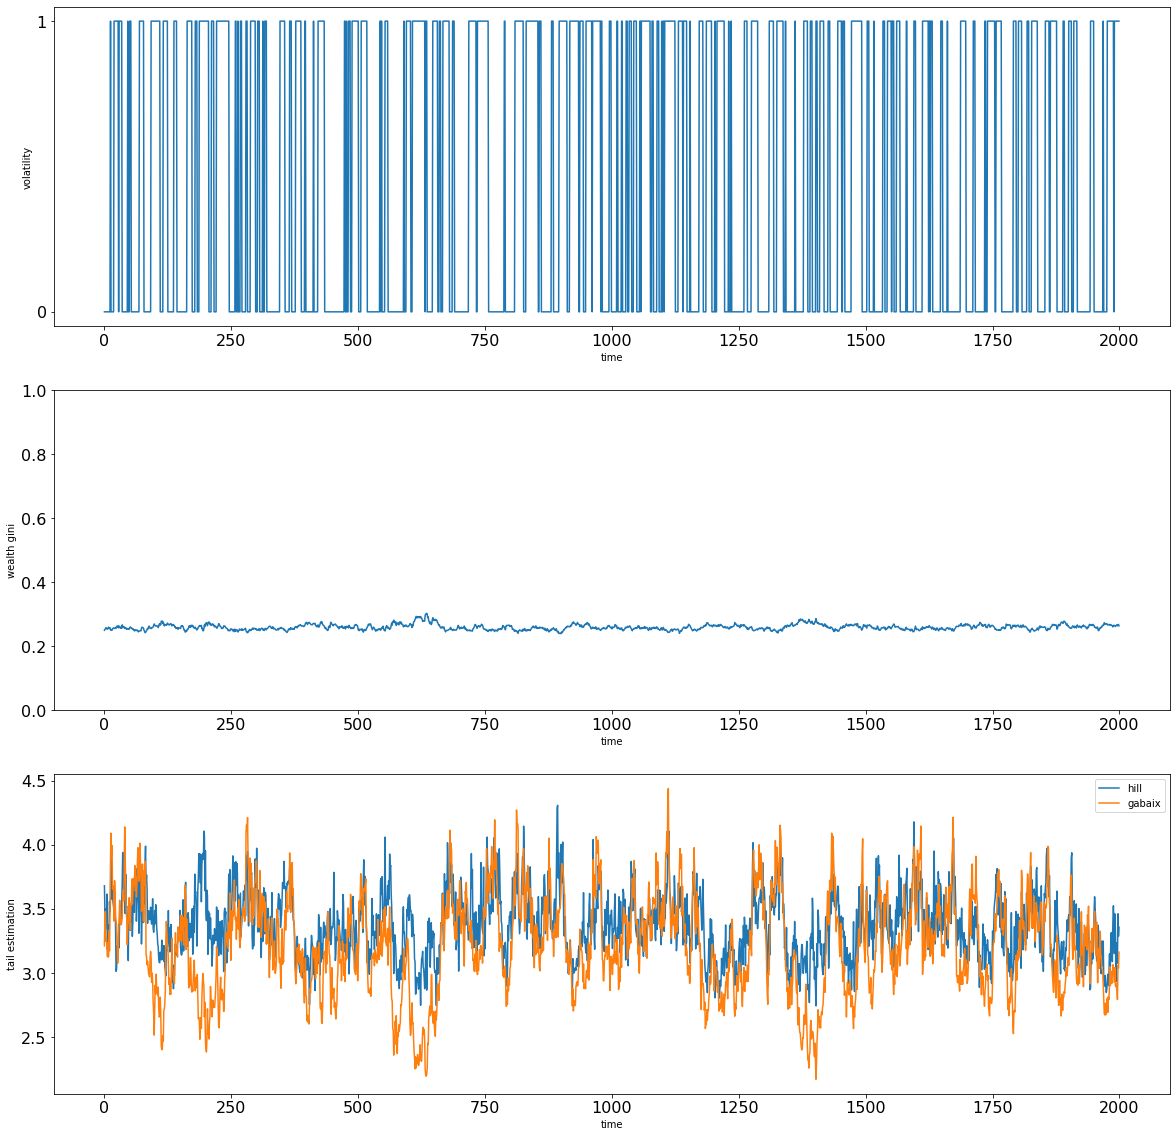

Respectively, the mean, variance and autocorrelation of ginis are 0.2591482124203337 7.293716523729978e-05 -0.01507221463443504
CPU times: user 2min 31s, sys: 11.1 s, total: 2min 42s
Wall time: 25.7 s


In [26]:
%%time
ginis7, tail_index_hill7, tail_index_gabaix7, z_seq_new7, dists7 = imp.dynamic_inequality(ifp7, a_star7, σ_star7,
                                                                                          num_households=2000,
                                                                                          burn_in_length=50,
                                                                                          sim_length=2000,
                                                                                          c=1,
                                                                                         z=0)

imp.plot_dynamic_inequality(z_seq_new7, ginis7, tail_index_hill7, tail_index_gabaix7,
                           path='/Users/shuhu/Desktop/1_papers_w:john/3_thesis/figures/fig53.png')

print('Respectively, the mean, variance and autocorrelation of ginis are', 
      np.mean(ginis7), 
      np.var(ginis7), 
      np.mean(sm.estimated_autocorrelation(ginis7)))